# Mesa ABM of the Keep Threshold Relay

### Simulation notes and instructions

Notes:
* Nodes are created simulataneously using the Mesa SimultaneousActivation scheduler
* The nodes go through a bootstrap phase based on Antonio's diagram. They can only form groups if they are in the mainloop forked state.
* Relay requests are currently bernoulli trials
* Each step could be assumed to be a block
* Singature events are modeled by default as asynchronous with a step delay to mimick the block delay
* We assume that 1 node = 1 staker

Instructions:
1. Change variables
2. Click on the restart and run kernel icon for ipython


In [1]:
import random
import datetime
import numpy as np
import pandas as pd
import agent
import model
import matplotlib.pyplot as plt

**Initialize Variables**

In [2]:
# Group & Signature Parameters
group_size = 100 # number of virtual stakers in a group - nodes to stakers is a 1-many relationship
nodes = 200 # total number of nodes (assume 1 node = 1 staker)
active_group_threshold =10 # number of active groups to bootstrap at start
min_nodes = 40 # min number of nodes that must be online so as to increase the likelihood of lower max ownership
max_malicious_threshold = 20 # % of malicious node ownership needed to sign
signature_delay = 2 # lambda for poisson distribution used to generate a delay before the signature is executed
group_expiry = 14 # number of steps after which a group expires
Misbehaving_nodes = 10 # percent of nodes misbehaving during dkg
dkg_block_delay = 14 # blocks needed to run DKG
compromised_threshold = 0.3 # malicious + offline > threshold = compromised

#Node parameters
node_failure_percent = 10 # % of times nodes fail and have to reconnect
node_death_percent = 5 # % of time nodes fail and do not reconnect
node_connection_delay = 5 # max delay for a node to connect or reconnect after failure
node_mainloop_connection_delay = 3 # max delay for a node to fork or refork mainloop after failure

#Model Parameters
log_filename = 'master_sim.log'
run_number = 0
steps = 100 #blocks

Text(0.5, 1.0, 'Virtual Staker Cumulative Distribution')

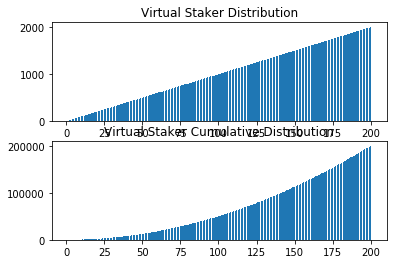

In [3]:
# Pre-processing Staker distributions
# Linear y = m * (x + 1) since indices start from 0
ticket_distribution = np.zeros(nodes) 

for i in range (0, nodes):
    ticket_distribution[i] =  10 * (i + 1) # m = 50 gives max y as 1000 which is 2% of 50000

x = np.linspace(1,nodes,nodes)
plt.subplot(2, 1, 1)
plt.bar(x, ticket_distribution)
plt.title("Virtual Staker Distribution")

cdf_L02=model.create_cdf(nodes,ticket_distribution)
plt.subplot(2, 1, 2)
plt.bar(x, cdf_L02)
plt.title("Virtual Staker Cumulative Distribution")

In [4]:
beacon_model = model.Beacon_Model(nodes, ticket_distribution, 
                                  active_group_threshold, 
                                  group_size, 
                                  max_malicious_threshold, 
                                  group_expiry, 
                                  node_failure_percent, 
                                  node_death_percent, 
                                  signature_delay,
                                  min_nodes,
                                  node_connection_delay,
                                  node_mainloop_connection_delay,
                                  log_filename,
                                  run_number,
                                  Misbehaving_nodes,
                                  dkg_block_delay,
                                  compromised_threshold)

In [5]:
active_group_size = []
signature_failures = []
for i in range (steps):
    beacon_model.step()

model_data = beacon_model.datacollector.get_model_vars_dataframe()
agent_data = beacon_model.datacollector.get_agent_vars_dataframe()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<function matplotlib.pyplot.show(*args, **kw)>

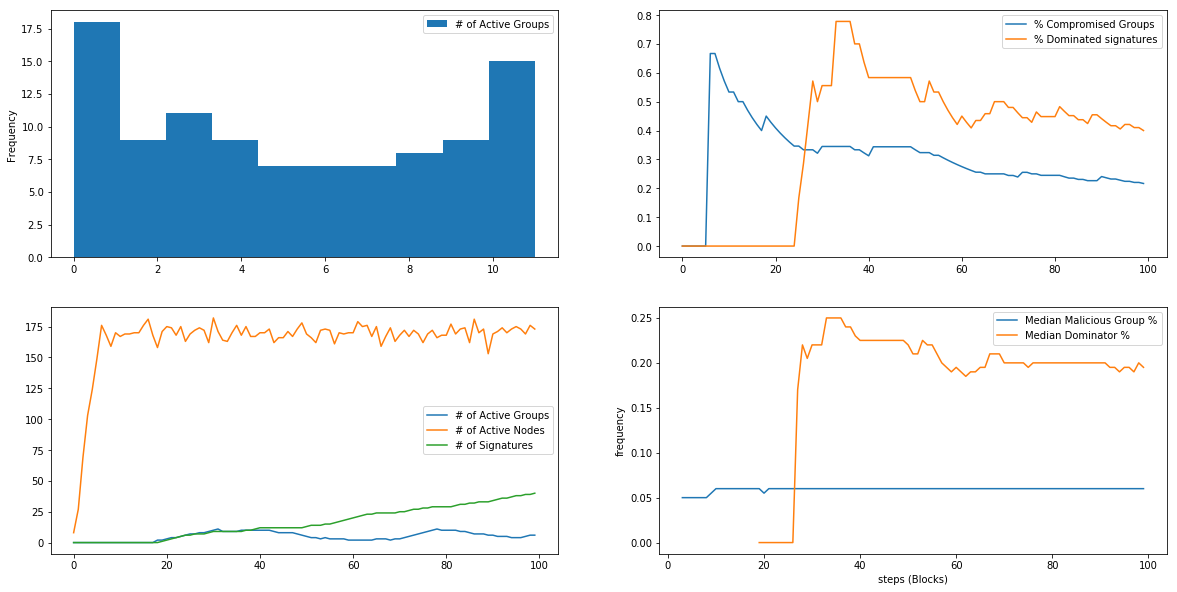

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (20,10))

#plt.figure(figsize = (10,10))
#plt.subplot(3, 1, 1)
model_data.plot(kind='hist', ax = axes[0,0], legend = True, y = ['# of Active Groups'])
plt.xlabel("# of active groups")
plt.ylabel("frequency")

model_data.plot(kind='line', ax = axes[1,0], legend = True, y = ['# of Active Groups', '# of Active Nodes', '# of Signatures' ])
plt.xlabel("steps (Blocks)")
plt.show

model_data.plot(kind='line', ax = axes[1,1], legend = True, y = ['Median Malicious Group %','Median Dominator %'])
plt.xlabel("steps (Blocks)")
plt.show


model_data.plot(kind='line', ax = axes[0,1], legend = True, y = ['% Compromised Groups','% Dominated signatures'])
plt.xlabel("steps (Blocks)")
plt.show


* % of signatures dominated

In [7]:

data = agent_data[(agent_data['Type']=='group') & (agent_data['Type_ID']==3) ]
data

#data['Ownership Distribution'][3]


,,Type_ID,Type,Node Status (Connection_Mainloop_Stake),Status,Malicious,DKG Block Delay,Ownership Distribution,Malicious %,Offline %,Dominator %
Step,AgentID,,,,,,,,,,
4,203,3,group,None,dkg,None,13.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.03,0.07,NaN
5,203,3,group,None,dkg,None,12.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.03,0.11,NaN
6,203,3,group,None,compromised,None,11.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.03,0.31,NaN
7,203,3,group,None,compromised,None,11.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.03,0.31,NaN
8,203,3,group,None,compromised,None,11.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.03,0.31,NaN
9,203,3,group,None,compromised,None,11.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.03,0.31,NaN
10,203,3,group,None,compromised,None,11.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.03,0.31,NaN
11,203,3,group,None,compromised,None,11.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.03,0.31,NaN
12,203,3,group,None,compromised,None,11.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.03,0.31,NaN


In [8]:
model_data

,# of Active Groups,# of Active Nodes,# of Signatures,Median Malicious Group %,% Compromised Groups,Median Dominator %,% Dominated signatures
0,0,8,0,NaN,0.000000,NaN,0.000000
1,0,27,0,NaN,0.000000,NaN,0.000000
2,0,69,0,NaN,0.000000,NaN,0.000000
3,0,103,0,0.050,0.000000,NaN,0.000000
4,0,124,0,0.050,0.000000,NaN,0.000000
5,0,149,0,0.050,0.000000,NaN,0.000000
6,0,176,0,0.050,0.666667,NaN,0.000000
7,0,168,0,0.050,0.666667,NaN,0.000000
8,0,159,0,0.050,0.615385,NaN,0.000000
9,0,170,0,0.055,0.571429,NaN,0.000000
